# Lithology Prediction from Geophysical Data using Machine Learning #
* **The magnetic and radiometric physics of rocks**
    * Different rocks have different concentrations of naturally occurring U, Th, K
    * Airborne radiometric sensors measure radioactivity over different lithologies
    * The measured data can be processed to obtain an equivalent amount of U(in ppm), Th(ppm), K(in percentage) in the rock
    * Airborne magnetic data captures earth's magnetic field 
    * The data is a representation of the amount of magnetic mineral enrichment of rocks
    * The airborne radiometric(eU, eTh, K) and magnetic field data in combination bear the information of the rock type
* **How Machine Learning can be used to Predict Lithology from geophysical data?**
    * In a geological mapping only a few samples are collected at few selected locations
    * From the collected data a geology map is prepared. 
    * Since only a few locations have been mapped, most of the map is actually inferred/interpolated maps
    * Aerogeophysical data are typically highly dense(sample location interval~from few meters to few hundreds of meters) and uniform grids are prepared
    * **We have few points(geology field points) where lithology is known and geophysical data are also available(Training Points)**
    * **At rest of the points geophysical data are available but no actual lithology sample is there(Test Points)**
    * ML algorithm would be trained over the training locations to make the machine understand relation between geophysical data and actual lithology
    * The trained algorithm would be used to predict lithology from geophysical data at the test locations
    * In our data we actually have all points covered. Still as an example we will split the data and pretend that some points are training points 

In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                # For grid/colourmap plotting
import geopandas as gpd              # For handling geospatila data and map visualization
from pyproj import Proj              # Geographical projection library. Needed, since all calculations are to be carried out in meters(UTM) 
from shapely.geometry import Point   # Handling point geometry of geospatial data
from geopandas import GeoDataFrame   # Similaar to pandas dataframe geodataframe handles geospatial data in dataframe format
import warnings                      # Not an essential module. Python often throws warning(not errors!) when something we do, it does not like but stil runs the code without any hiderance.
warnings.filterwarnings('ignore')    # Python does not show us the warning, keeps the code clean(no warning pop-ups)

In [2]:
myProj = Proj("+proj=utm +zone=44 +north +datum=WGS84 +units=m +no_defs")   # Define UTM 44N projection for the problem

In [3]:
# Reading the data and cleaning
df=pd.read_csv('Sakoli_GPLitho_ML.csv')
df.dropna(inplace=True)
df.drop(df.columns[[0]], axis=1, inplace=True)
df

UTM_X    UTM_Y    Mag_RTP    K_perc    eU_ppm    eTh_ppm  \
0       317820  2305020   72.55052  0.825112  1.725351   7.252636   
1       317820  2305080   70.09288  0.790753  1.625488   6.926016   
2       317820  2305140   81.60358  0.723196  1.526369   6.573108   
3       317820  2305200  101.30580  0.640333  1.479249   6.353679   
4       317820  2305260  118.11180  0.573513  1.539788   6.380909   
...        ...      ...        ...       ...       ...        ...   
210990  341940  2301600  551.58150  1.804564  2.815594  11.530880   
210991  341940  2301660  578.41550  1.783419  2.773180  11.585760   
210992  341940  2301720  610.77470  1.745279  2.794343  11.548410   
210993  341940  2301780  653.22430  1.692226  2.790611  11.482460   
210994  341940  2301840  704.58760  1.641215  2.747058  11.521030   

                    LITHOLOGIC  
0                       BASALT  
1                       BASALT  
2                       BASALT  
3                       BASALT  
4                       BASALT  
...                        ...  
210990  ANDALUSITE MICA SCHIST  
210991  ANDALUSITE MICA SCHIST  
210992  ANDALUSITE MICA SCHIST  
210993  ANDALUSITE MICA SCHIST  
210994  ANDALUSITE MICA SCHIST  

[210995 rows x 7 columns]

<Axes: xlabel='LITHOLOGIC'>

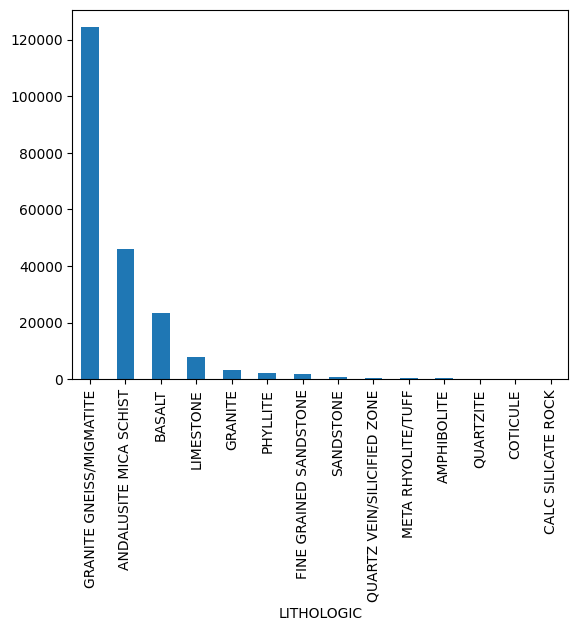

In [4]:
# Check the name of the lithologes available in the area and see at how many points we a certain rock type occurs
df['LITHOLOGIC'].value_counts().plot(kind='bar')

In [5]:
# Creating Geodataframe for enabling geospatial features to the data
long,lat=myProj(df.UTM_X.values,df.UTM_Y.values, inverse=True)  # Inverse transform the UTM_X, UTM_Y dat to Long, lat
geometry = [Point(xy) for xy in zip(long, lat)]                 # Creating point geometry for every location
df = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)       # converting the panda dataframe to a geodataframe
df

UTM_X    UTM_Y    Mag_RTP    K_perc    eU_ppm    eTh_ppm  \
0       317820  2305020   72.55052  0.825112  1.725351   7.252636   
1       317820  2305080   70.09288  0.790753  1.625488   6.926016   
2       317820  2305140   81.60358  0.723196  1.526369   6.573108   
3       317820  2305200  101.30580  0.640333  1.479249   6.353679   
4       317820  2305260  118.11180  0.573513  1.539788   6.380909   
...        ...      ...        ...       ...       ...        ...   
210990  341940  2301600  551.58150  1.804564  2.815594  11.530880   
210991  341940  2301660  578.41550  1.783419  2.773180  11.585760   
210992  341940  2301720  610.77470  1.745279  2.794343  11.548410   
210993  341940  2301780  653.22430  1.692226  2.790611  11.482460   
210994  341940  2301840  704.58760  1.641215  2.747058  11.521030   

                    LITHOLOGIC                   geometry  
0                       BASALT  POINT (79.24918 20.83629)  
1                       BASALT  POINT (79.24917 20.83683)  
2                       BASALT  POINT (79.24916 20.83737)  
3                       BASALT  POINT (79.24916 20.83792)  
4                       BASALT  POINT (79.24915 20.83846)  
...                        ...                        ...  
210990  ANDALUSITE MICA SCHIST  POINT (79.48122 20.80761)  
210991  ANDALUSITE MICA SCHIST  POINT (79.48122 20.80815)  
210992  ANDALUSITE MICA SCHIST  POINT (79.48121 20.80870)  
210993  ANDALUSITE MICA SCHIST  POINT (79.48121 20.80924)  
210994  ANDALUSITE MICA SCHIST  POINT (79.48120 20.80978)  

[210995 rows x 8 columns]

<Axes: >

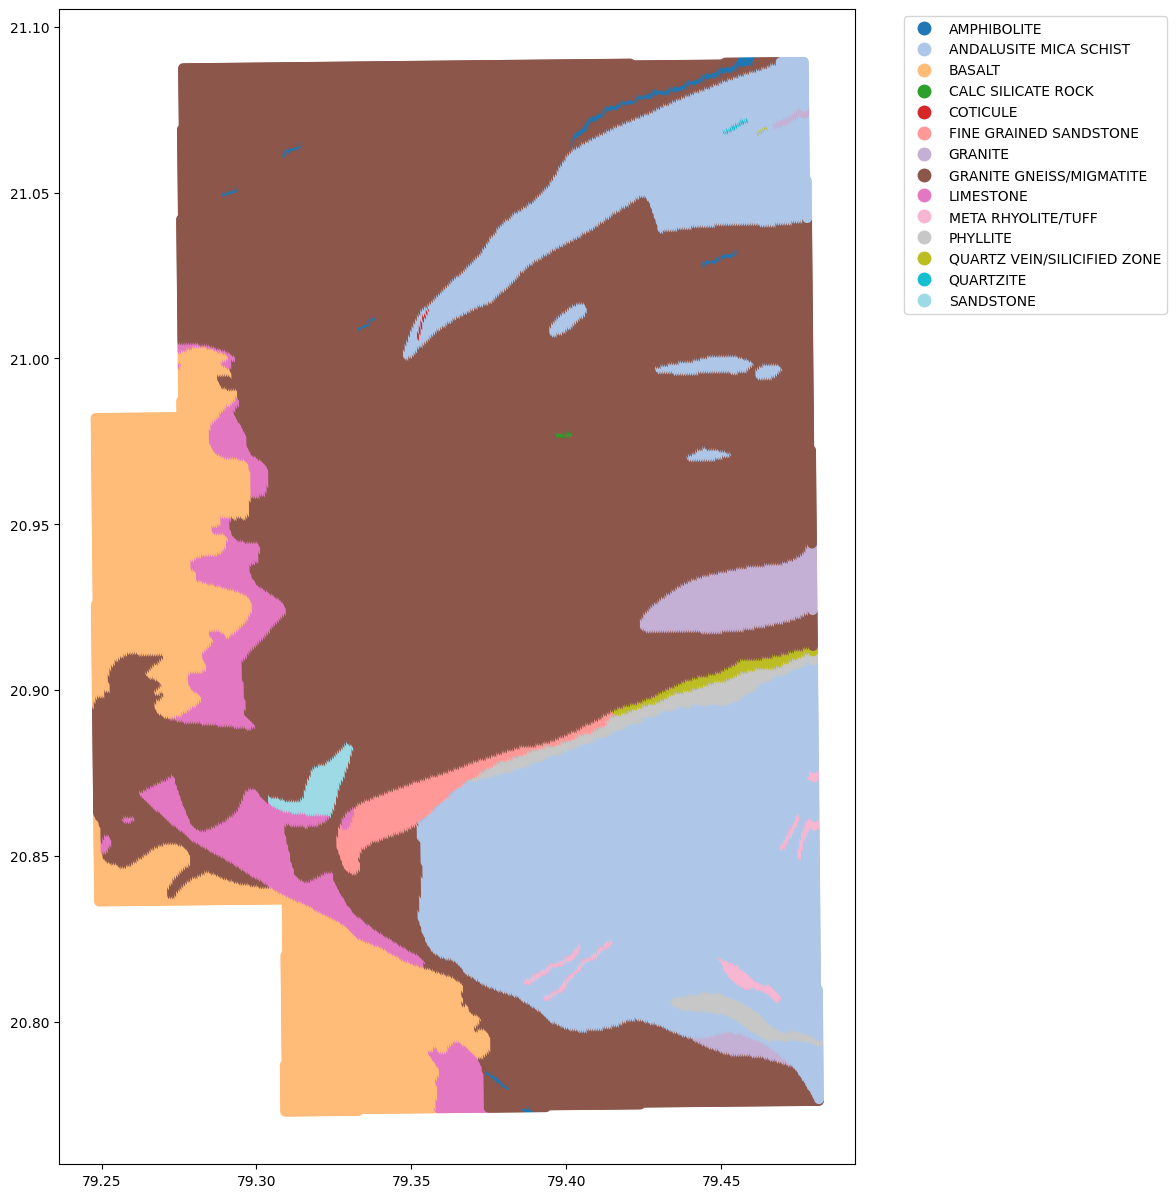

In [6]:
# Visualizing the lithology map
df.plot(
column="LITHOLOGIC",
    legend=True,
    figsize=(15,15),
    cmap='tab20', legend_kwds={'bbox_to_anchor': (1.4, 1)}
    )

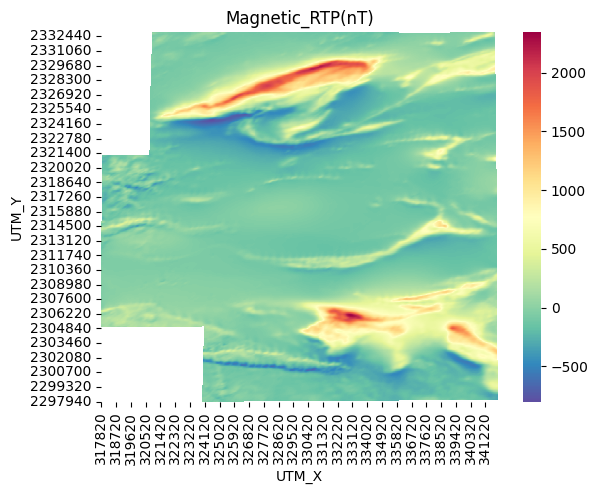

In [7]:
# Quick heat map of Magnetic(RTP)
pivotted=df.pivot(index='UTM_Y', columns='UTM_X', values='Mag_RTP')
ax=sns.heatmap(pivotted,cmap='Spectral_r')
ax.set_title('Magnetic_RTP(nT)')
ax.grid(False)
ax.invert_yaxis()

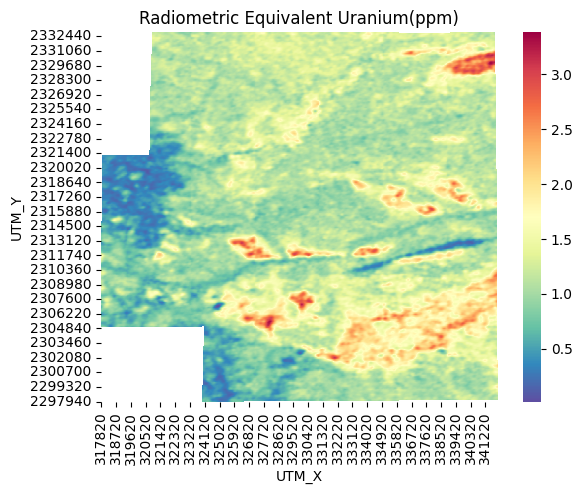

In [8]:
pivotted=df.pivot(index='UTM_Y', columns='UTM_X', values='K_perc')
ax=sns.heatmap(pivotted,cmap='Spectral_r')
ax.set_title('Radiometric Equivalent Uranium(ppm)')
ax.grid(False)
ax.invert_yaxis()

# Data Normalization/Standardisation and splitting(Training/Test)

In [9]:
from sklearn.preprocessing import StandardScaler       # Different data are in different range. We need to scale the data to have similar variance
from sklearn.model_selection import train_test_split   # To be used to split the dataframe into training set and test set
X = df.iloc[:,2:6].values
X = StandardScaler().fit_transform(X)
y = df.iloc[:,6].values
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42, stratify=y)

# We keep 30% data for Training, i.e. 30% of the area(scattered) is assumed to be truly geologically mapped
# 70% data is kept for test(these data are to be predicted by Machine Learning). We pretend as if we do not know the rock types of these points

In [10]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array(['AMPHIBOLITE', 'ANDALUSITE MICA SCHIST', 'BASALT',
       'CALC SILICATE ROCK', 'COTICULE', 'FINE GRAINED SANDSTONE',
       'GRANITE', 'GRANITE GNEISS/MIGMATITE', 'LIMESTONE',
       'META RHYOLITE/TUFF', 'PHYLLITE', 'QUARTZ VEIN/SILICIFIED ZONE',
       'QUARTZITE', 'SANDSTONE'], dtype=object), array([   73,  9175,  4692,     3,     4,   390,   646, 24864,  1550,
         110,   430,   110,     5,   147], dtype=int64))
(array(['AMPHIBOLITE', 'ANDALUSITE MICA SCHIST', 'BASALT',
       'CALC SILICATE ROCK', 'COTICULE', 'FINE GRAINED SANDSTONE',
       'GRANITE', 'GRANITE GNEISS/MIGMATITE', 'LIMESTONE',
       'META RHYOLITE/TUFF', 'PHYLLITE', 'QUARTZ VEIN/SILICIFIED ZONE',
       'QUARTZITE', 'SANDSTONE'], dtype=object), array([  294, 36699, 18768,    14,    16,  1560,  2585, 99454,  6201,
         440,  1717,   441,    18,   589], dtype=int64))


<Axes: >

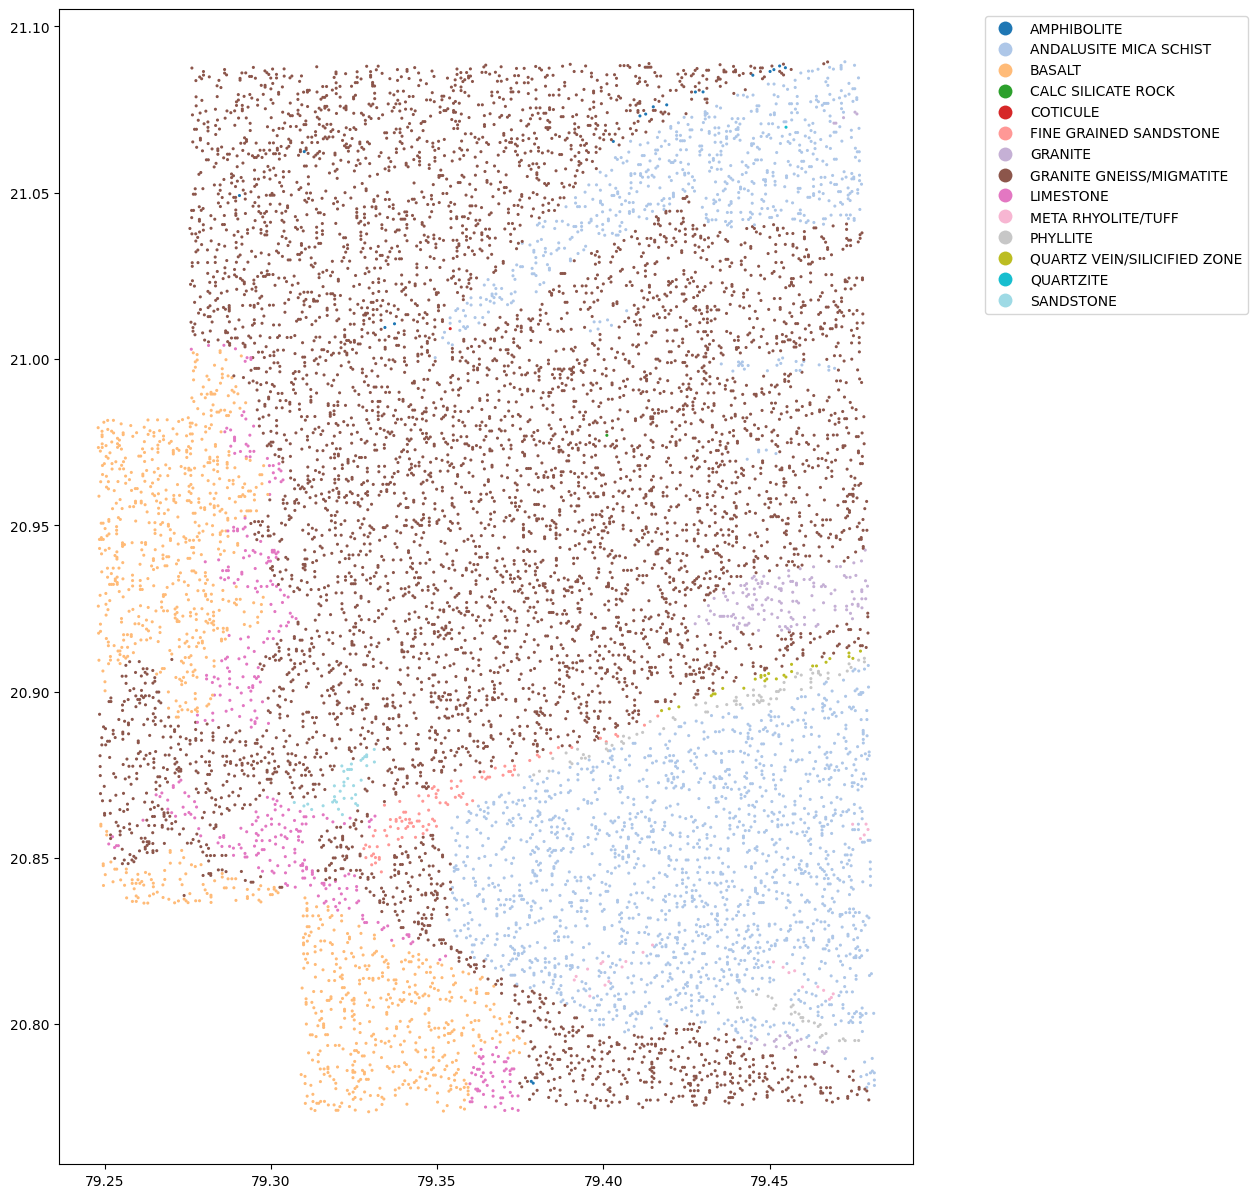

In [11]:
Xp = df.iloc[:,6:].values
yp = df.iloc[:,6].values
Xp_train,Xp_test,yp_train,yp_test=train_test_split(Xp,yp,train_size=0.05,random_state=42, stratify=yp)
df_trn=gpd.GeoDataFrame(Xp_train,columns=['Litho', 'geometry'])
df_trn.plot(
column="Litho",
    legend=True,
    figsize=(15,15),
    markersize=1.5,
    cmap='tab20', legend_kwds={'bbox_to_anchor': (1.4, 1)}
    )

# K-Nearest Neighbour algorithm for predicting Lithology from Geophysics

In [12]:
from sklearn.neighbors import KNeighborsClassifier     # For classifying the   

In [13]:
model=KNeighborsClassifier(n_neighbors=5)    # Model Builder with 5 nearest neighbours
model.fit(X_train, y_train)                  # The model learns the geophysics-Lithology relation from training data (Fitting)
y_pred = model.predict(X_test)               # The model is used to predict lithology from test data 

In [14]:
#from sklearn.metrics import classification_report, accuracy_score

#result2 = accuracy_score(y_test,y_pred)
#print('Accuracy:',result2)

#result1 = classification_report(y_test, y_pred)
#print('Classification Report:',)
#print (result1)

Accuracy: 0.8001137467712505
Classification Report:
                             precision    recall  f1-score   support

                AMPHIBOLITE       0.19      0.08      0.11       294
     ANDALUSITE MICA SCHIST       0.77      0.75      0.76     36699
                     BASALT       0.79      0.82      0.81     18768
         CALC SILICATE ROCK       0.00      0.00      0.00        14
                   COTICULE       0.00      0.00      0.00        16
     FINE GRAINED SANDSTONE       0.35      0.17      0.23      1560
                    GRANITE       0.45      0.22      0.29      2585
   GRANITE GNEISS/MIGMATITE       0.83      0.89      0.86     99454
                  LIMESTONE       0.53      0.29      0.37      6201
         META RHYOLITE/TUFF       0.44      0.12      0.19       440
                   PHYLLITE       0.61      0.23      0.33      1717
QUARTZ VEIN/SILICIFIED ZONE       0.51      0.36      0.42       441
                  QUARTZITE       0.25      0.06  

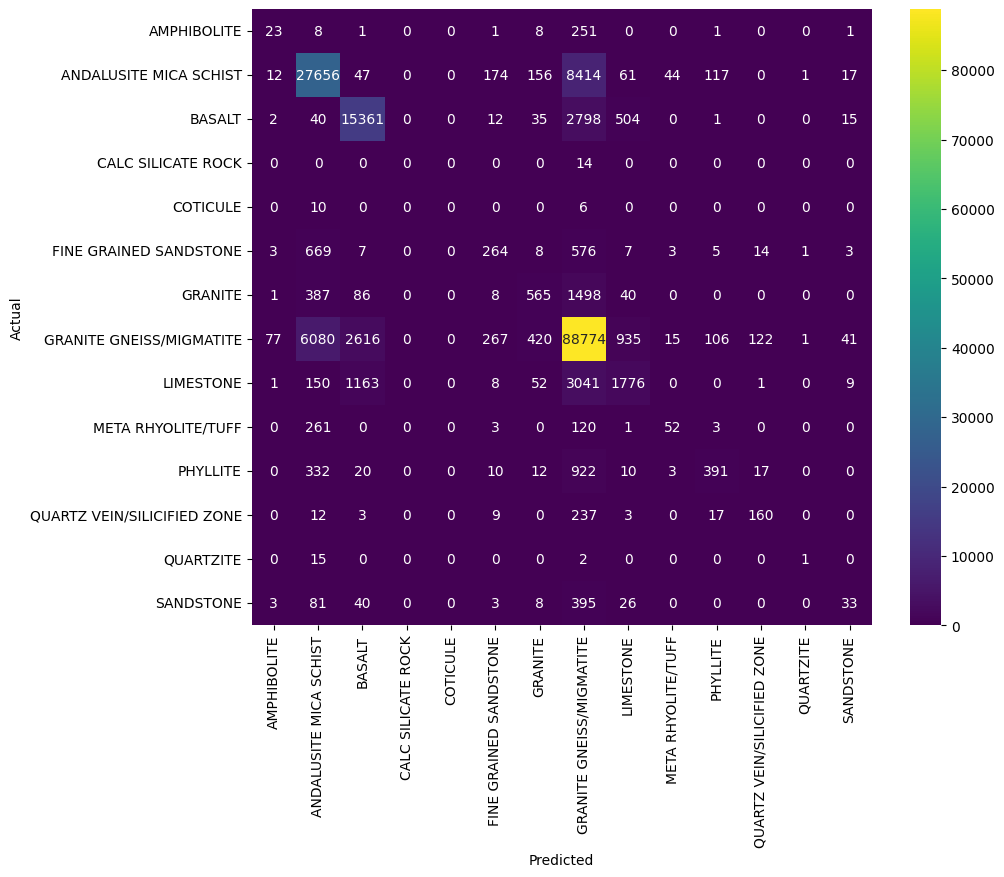

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,8))
labels=np.unique(y_train)
sns.heatmap(cm, fmt='.0f', annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)    # If does not work, do 'pip install matplotlib==3.7.3' &  conda install seaborn==0.13.0 
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [16]:
all_pred=model.predict(X)

In [17]:
df['Litho_pred_kNN5']=all_pred
df

UTM_X    UTM_Y    Mag_RTP    K_perc    eU_ppm    eTh_ppm  \
0       317820  2305020   72.55052  0.825112  1.725351   7.252636   
1       317820  2305080   70.09288  0.790753  1.625488   6.926016   
2       317820  2305140   81.60358  0.723196  1.526369   6.573108   
3       317820  2305200  101.30580  0.640333  1.479249   6.353679   
4       317820  2305260  118.11180  0.573513  1.539788   6.380909   
...        ...      ...        ...       ...       ...        ...   
210990  341940  2301600  551.58150  1.804564  2.815594  11.530880   
210991  341940  2301660  578.41550  1.783419  2.773180  11.585760   
210992  341940  2301720  610.77470  1.745279  2.794343  11.548410   
210993  341940  2301780  653.22430  1.692226  2.790611  11.482460   
210994  341940  2301840  704.58760  1.641215  2.747058  11.521030   

                    LITHOLOGIC                   geometry  \
0                       BASALT  POINT (79.24918 20.83629)   
1                       BASALT  POINT (79.24917 20.83683)   
2                       BASALT  POINT (79.24916 20.83737)   
3                       BASALT  POINT (79.24916 20.83792)   
4                       BASALT  POINT (79.24915 20.83846)   
...                        ...                        ...   
210990  ANDALUSITE MICA SCHIST  POINT (79.48122 20.80761)   
210991  ANDALUSITE MICA SCHIST  POINT (79.48122 20.80815)   
210992  ANDALUSITE MICA SCHIST  POINT (79.48121 20.80870)   
210993  ANDALUSITE MICA SCHIST  POINT (79.48121 20.80924)   
210994  ANDALUSITE MICA SCHIST  POINT (79.48120 20.80978)   

               Litho_pred_kNN5  
0                    LIMESTONE  
1                       BASALT  
2                    LIMESTONE  
3                       BASALT  
4                       BASALT  
...                        ...  
210990  ANDALUSITE MICA SCHIST  
210991  ANDALUSITE MICA SCHIST  
210992  ANDALUSITE MICA SCHIST  
210993  ANDALUSITE MICA SCHIST  
210994  ANDALUSITE MICA SCHIST  

[210995 rows x 9 columns]

<Axes: >

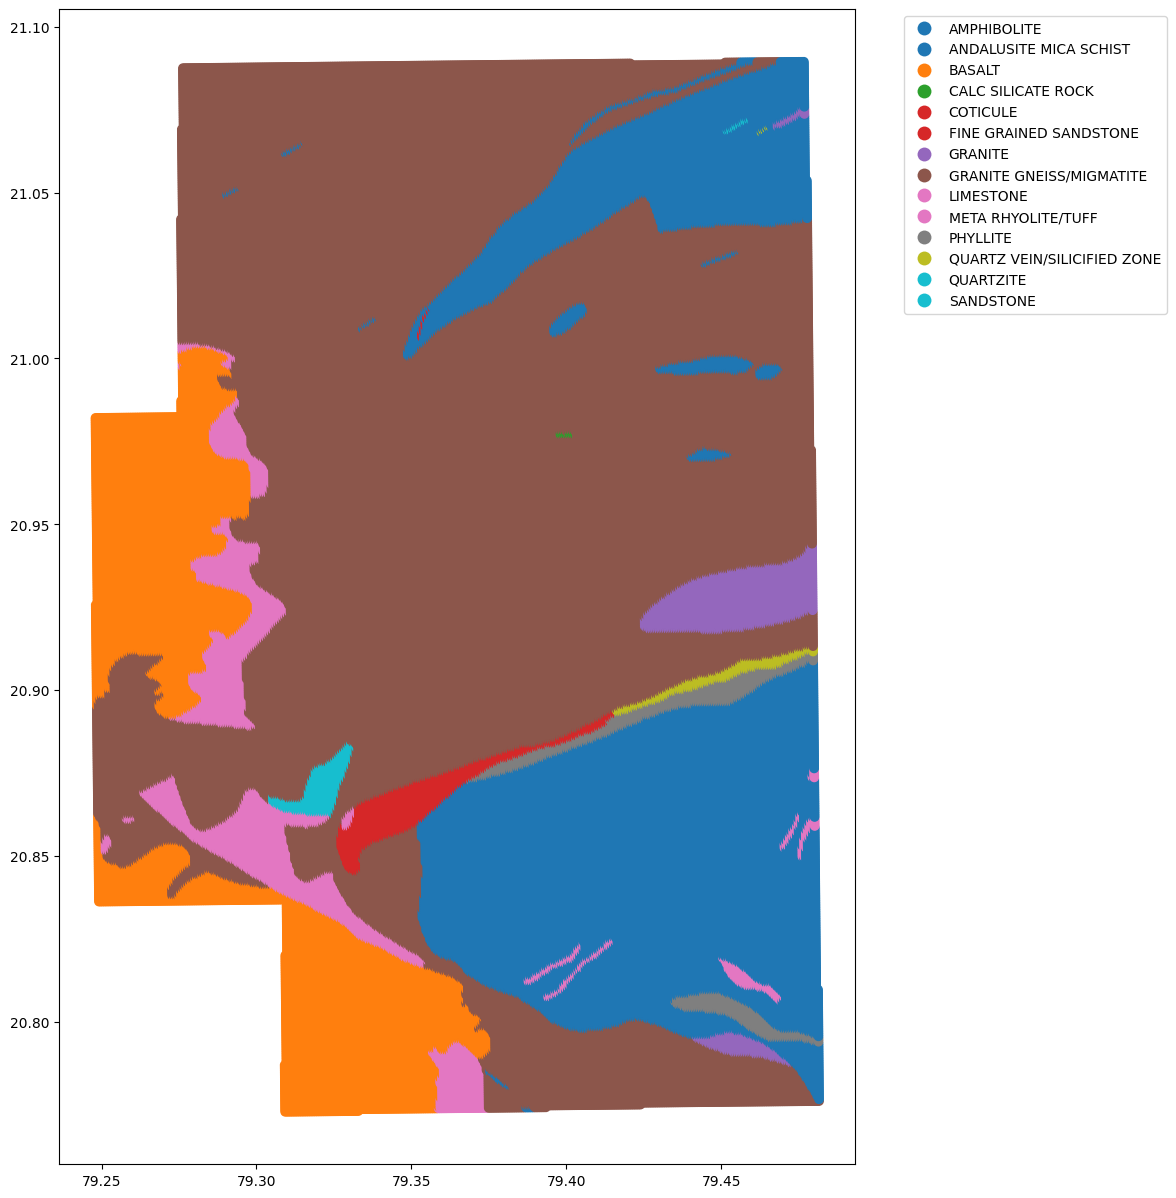

In [18]:
df.plot(
column="LITHOLOGIC",
    legend=True,
    figsize=(15,15),
    cmap='tab10', legend_kwds={'bbox_to_anchor': (1.4, 1)}
    )

<Axes: >

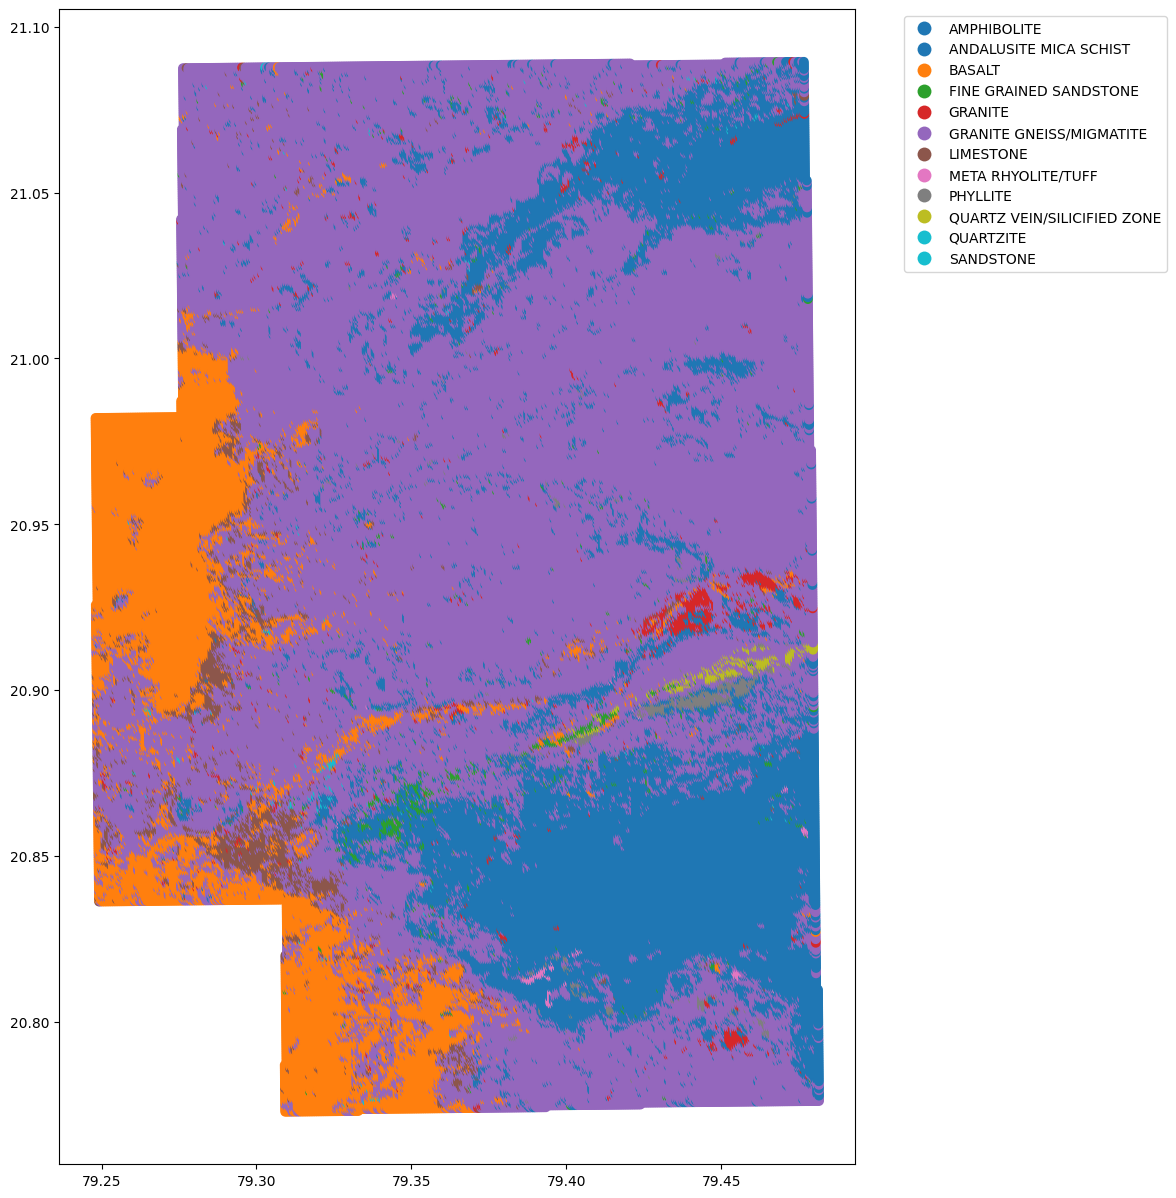

In [19]:
df.plot(
column="Litho_pred_kNN5",
    legend=True,
    figsize=(15,15),
    cmap='tab10', legend_kwds={'bbox_to_anchor': (1.4, 1)}
    )

# Random Forest algorithm for predicting Lithology from Geophysics

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
all_pred=model.predict(X)
df['Litho_pred_RF100']=all_pred
df

UTM_X    UTM_Y    Mag_RTP    K_perc    eU_ppm    eTh_ppm  \
0       317820  2305020   72.55052  0.825112  1.725351   7.252636   
1       317820  2305080   70.09288  0.790753  1.625488   6.926016   
2       317820  2305140   81.60358  0.723196  1.526369   6.573108   
3       317820  2305200  101.30580  0.640333  1.479249   6.353679   
4       317820  2305260  118.11180  0.573513  1.539788   6.380909   
...        ...      ...        ...       ...       ...        ...   
210990  341940  2301600  551.58150  1.804564  2.815594  11.530880   
210991  341940  2301660  578.41550  1.783419  2.773180  11.585760   
210992  341940  2301720  610.77470  1.745279  2.794343  11.548410   
210993  341940  2301780  653.22430  1.692226  2.790611  11.482460   
210994  341940  2301840  704.58760  1.641215  2.747058  11.521030   

                    LITHOLOGIC                   geometry  \
0                       BASALT  POINT (79.24918 20.83629)   
1                       BASALT  POINT (79.24917 20.83683)   
2                       BASALT  POINT (79.24916 20.83737)   
3                       BASALT  POINT (79.24916 20.83792)   
4                       BASALT  POINT (79.24915 20.83846)   
...                        ...                        ...   
210990  ANDALUSITE MICA SCHIST  POINT (79.48122 20.80761)   
210991  ANDALUSITE MICA SCHIST  POINT (79.48122 20.80815)   
210992  ANDALUSITE MICA SCHIST  POINT (79.48121 20.80870)   
210993  ANDALUSITE MICA SCHIST  POINT (79.48121 20.80924)   
210994  ANDALUSITE MICA SCHIST  POINT (79.48120 20.80978)   

               Litho_pred_kNN5          Litho_pred_RF100  
0                    LIMESTONE  GRANITE GNEISS/MIGMATITE  
1                       BASALT                    BASALT  
2                    LIMESTONE                 LIMESTONE  
3                       BASALT                    BASALT  
4                       BASALT                    BASALT  
...                        ...                       ...  
210990  ANDALUSITE MICA SCHIST    ANDALUSITE MICA SCHIST  
210991  ANDALUSITE MICA SCHIST    ANDALUSITE MICA SCHIST  
210992  ANDALUSITE MICA SCHIST    ANDALUSITE MICA SCHIST  
210993  ANDALUSITE MICA SCHIST    ANDALUSITE MICA SCHIST  
210994  ANDALUSITE MICA SCHIST    ANDALUSITE MICA SCHIST  

[210995 rows x 10 columns]

In [21]:
from sklearn import metrics  
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF RF model:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF RF model: 0.8175252968079812


<Axes: >

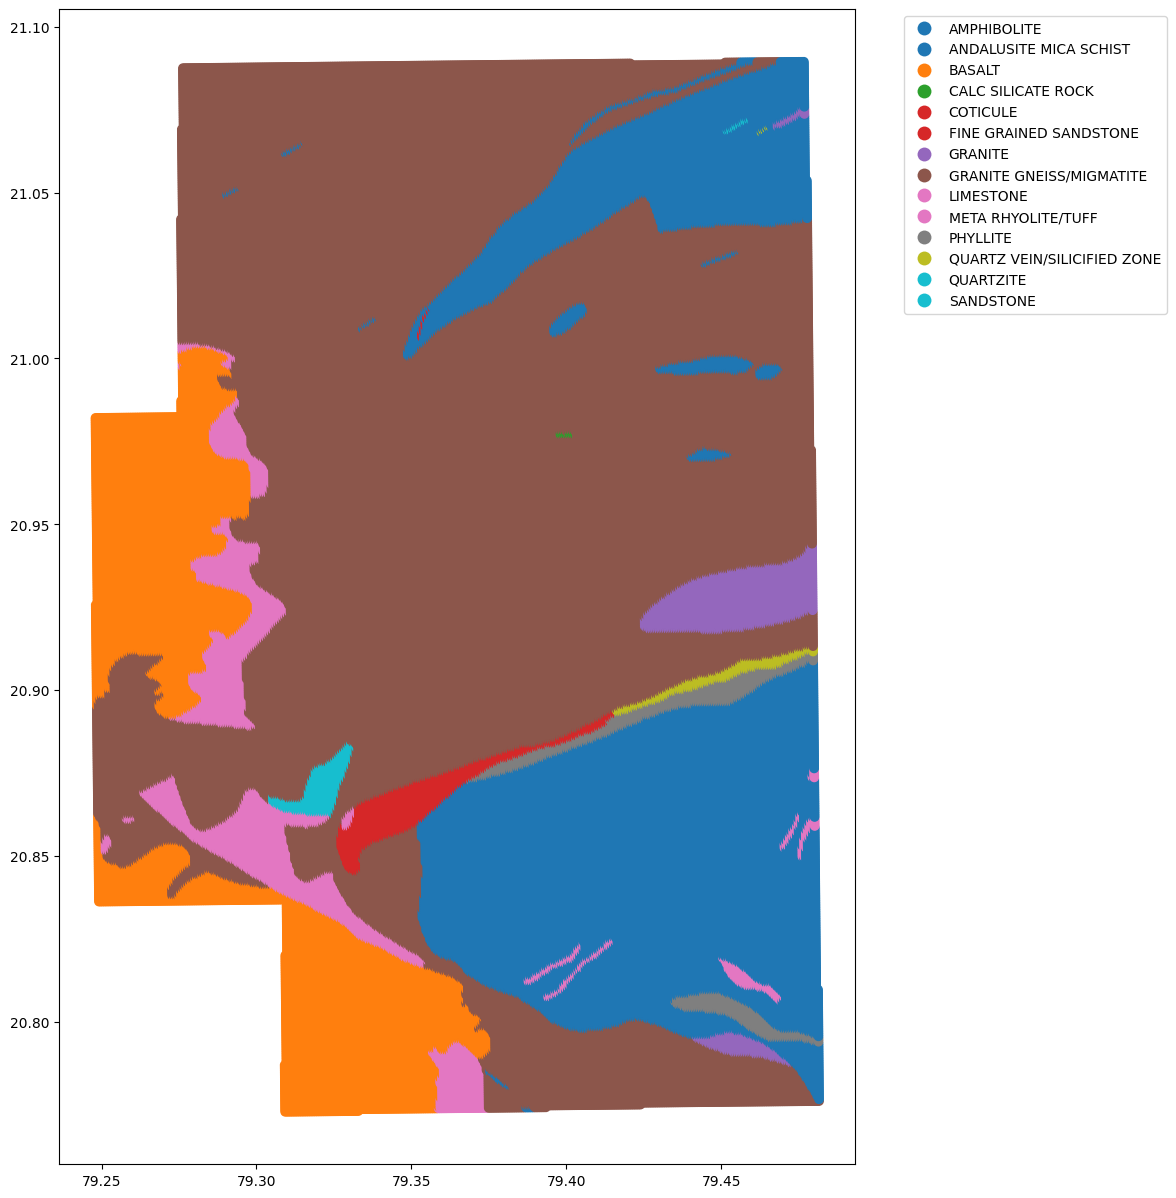

In [22]:
df.plot(
column="LITHOLOGIC",
    legend=True,
    figsize=(15,15),
    cmap='tab10', legend_kwds={'bbox_to_anchor': (1.4, 1)}
    )

<Axes: >

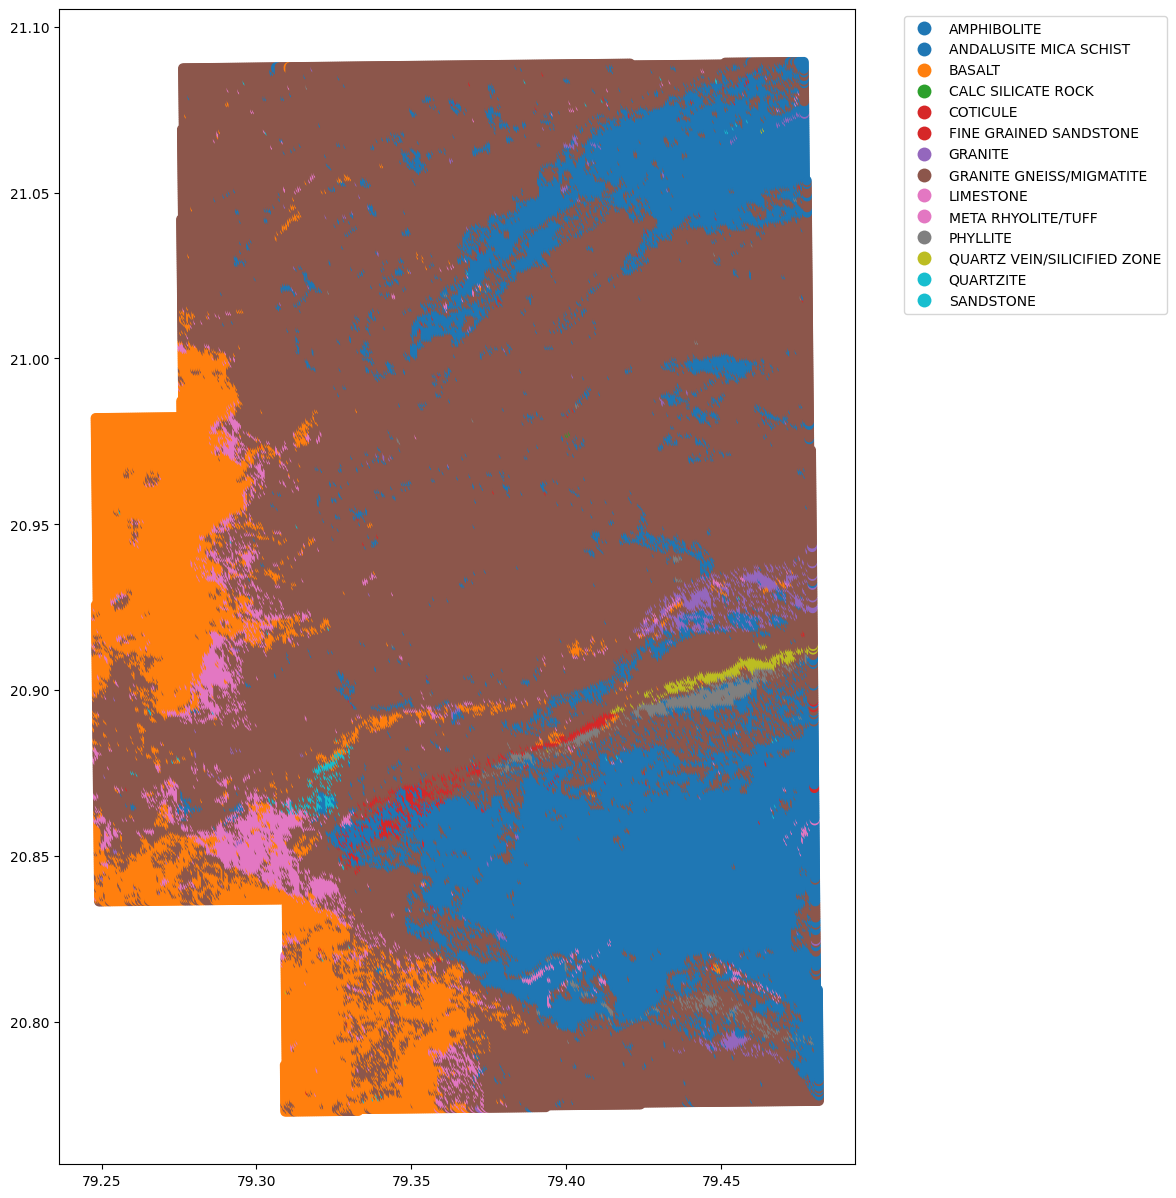

In [23]:
df.plot(
column="Litho_pred_RF100",
    legend=True,
    figsize=(15,15),
    cmap='tab10', legend_kwds={'bbox_to_anchor': (1.4, 1)}
    )

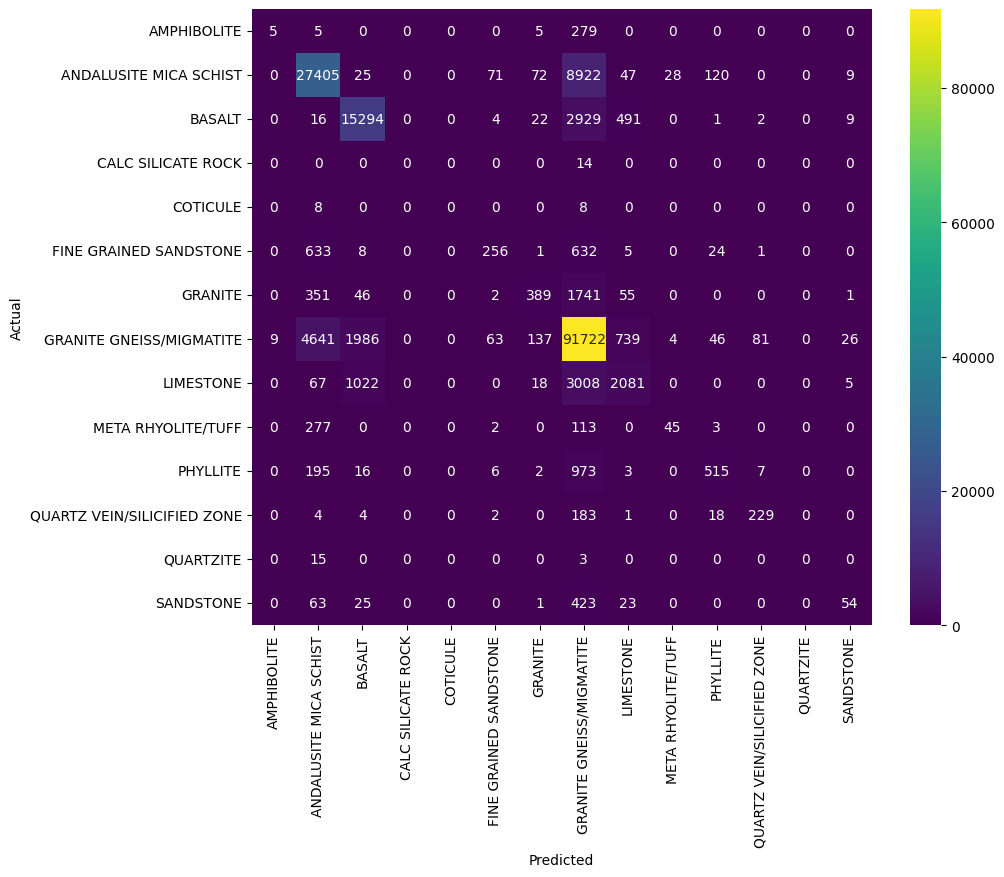

In [24]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,8))
labels=np.unique(y_train)
sns.heatmap(cm, fmt='.0f', annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)    # If does not work, do 'pip install matplotlib==3.7.3' &  conda install seaborn==0.13.0 
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)